# Analyzing COVID-19 in the United States and Its Impact

Throughout the final unit we have explored COVID-19 and its spread throughout the world. 

The visualizations in this notebook will focus on and explore its impact on the United States.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
#Import all libraries you may need in this cell:
import numpy as np # used to arrange x-axis values for bar plot
import matplotlib.pyplot as plt #to make a visualization
import pandas as pd #to read in csv files and create dataframes
import plotly.graph_objects as go # to create a colorful map visualization 
from matplotlib.dates import DateFormatter #to use matplotlib's date formatter
%matplotlib inline 
# ^ sets the backend of matplotlib to the 'inline' backend.
# With this backend, the output of plotting commands is displayed inline within frontends like 
# the Jupyter notebook, directly below the code cell that produced it.

## 1 - Finding the COVID-19 numbers per state.

In [11]:
#3 lists of data compiled for your convenience

#List of states sorted in alphabetical order.
statesList = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

#List of state abbreviations sorted in alphabetical order.
stateAbbreviationList = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND",
"OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]

#Corresponding latitudes for each state.
latitudes = [32.361538, 58.301935, 33.448457, 34.736009, 38.555605, 39.7391667, 41.767, 39.161921, 30.4518, 33.76,
            21.30895, 43.613739, 39.783250, 39.790942, 41.590939, 39.04, 38.197274, 30.45809, 44.323535, 38.972945,
            42.2352, 42.7335, 44.95,32.320, 38.572954,46.595805,40.809868,39.160949,43.220093, 40.221741,35.667231,
            42.659829,35.771, 48.813343,39.962245, 35.482309,44.931109, 40.269789, 41.82355, 34.000,  44.367966,36.165,
            30.266667,40.7547,44.26639, 37.54, 47.042418,38.349497,43.074722, 41.145548]

#Corresponding longitudes for each state.
longitudes = [-86.279118,-134.419740,-112.073844, -92.331122,-121.468926 ,-104.984167 ,-72.677 , -75.526755 ,
              -84.27277,-84.39,-157.826182 ,-116.237651 ,-89.650373 ,-86.147685 ,-93.620866 ,-95.69 , -84.86311
              ,-91.140229 ,-69.765261 ,-76.501157 ,-71.0275 ,-84.5467 , -93.094 ,-90.207 , -92.189283
              , -112.027031 ,-96.675345 ,-119.753877 ,-71.549127 , -74.756138, -105.964575 , -73.781339 ,-78.638 
              ,-100.779004 ,-83.000647 , -97.534994,-123.029159 ,-76.875613 , -71.422132, -81.035, -100.336378
              ,-86.784 ,-97.75 ,-111.892622 ,-72.57194 ,-77.46 ,-122.893077 ,-81.633294 ,-89.384444 ,-104.802042]


Use the New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create **two functions** that takes the name of a state as input and returns the bar plots of 1) # of cases over time and 2) # of deaths over time for that specific state.

In [12]:
nyt_df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

In [13]:
# Cases function
def plot_cases(state): # defines function
  user_state = nyt_df.loc[nyt_df["state"] == state] # seperates rows based on the state the user enters
  new_df = user_state.loc[: , ['date', 'cases']] #.loc[rows, columns] # the : means "select all"
  fig = plt.figure() # sets the figure
  ax = fig.add_axes([0, 0, 2, 2]) #resizes figure: [starting point x, startng point y, length, width]
  dates = new_df['date'] # x values
  cases = new_df['cases'] # y values

  ax.xaxis.set_major_locator(plt.MaxNLocator(7)) # displays 7 x axis ticks 
  plt.plot(dates, cases) # plots line chart (x, y) 
  plt.bar(dates, cases) # plots bar graph (x, height)
  plt.xlabel("Dates") # displays the x-axis label
  plt.ylabel("Number of Cases") # displays y-axis label
  plt.title("Cases of COVID-19 Over Time (" + state + ")") # displays the title 

  plt.show() # displays the figure alone

In [24]:
# Deaths function
def plot_deaths(state): # defines function
  user_state = nyt_df.loc[nyt_df["state"] == state]  # Seperates rows based on the state the user enters
  new_df = user_state.loc[: , ['date', 'deaths']] #.loc[rows, columns] # the : means "select all"
  fig = plt.figure() # sets the figure
  ax = fig.add_axes([0, 0, 2, 2]) #resizes figure: [starting point x, startng point y, length, width]
  dates = new_df['date'] # x values
  deaths = new_df['deaths'] # y values

  ax.xaxis.set_major_locator(plt.MaxNLocator(7))# displays 7 x axis ticks 
  plt.plot(dates, deaths) # plots line chart (x, y) 
  plt.bar(dates, deaths) # plots bar graph (x, height)
  plt.xlabel("Dates") # displays the x-axis label
  plt.ylabel("Number of Deaths") # displays y-axis label
  plt.title("Deaths of COVID-19 Over Time (" + state + ")") # displays the title 

  plt.savefig("barplot.png")
  # plt.show() displays the figure alone

Call the functions on your assigned state to visualize the data.

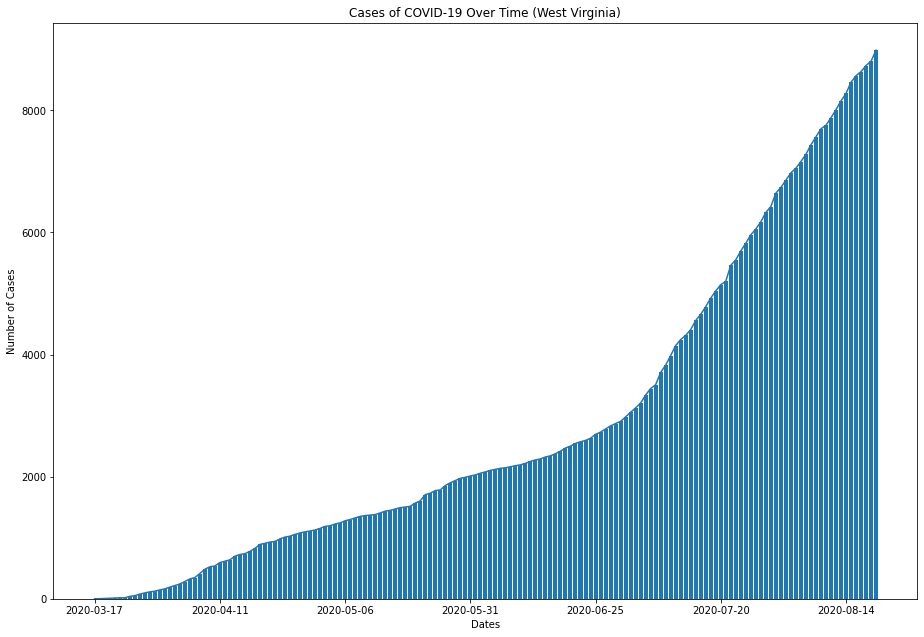

In [25]:
plot_cases("West Virginia")

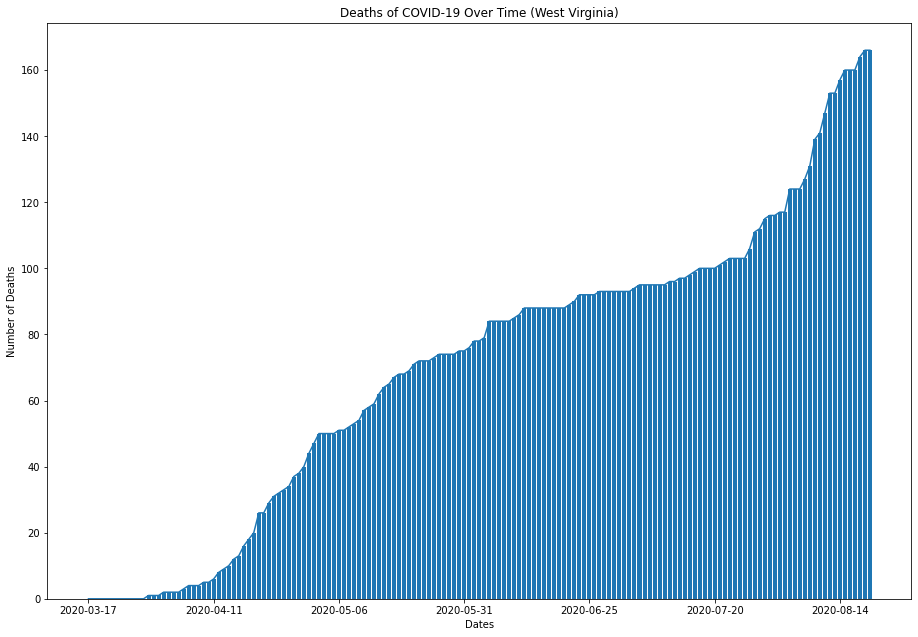

In [26]:
plot_deaths("West Virginia")

Use New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create a choropleth map of the United States based on its numbers of COVID-19 cases and deaths. (Use colors that you think are appropriate).

In [17]:
#Dataframe Formatter
def dfFormatter(df, selectColumn):
    #Separate df_formatted from df. Create list of states and their latitudes and longitudes.
    df_formatted = pd.DataFrame(statesList, columns = ['state'])
    df_formatted['lat'] = latitudes
    df_formatted['long'] = longitudes
    
    #Create columns for each date, start off by zeroing out everything.
    #previousDate = datetime.datetime(2020, 1, 1) #Commented out because datetime is no longer a type.
    previousDate = "2020-01-01"
    for i in range(len(df['date'])):
        if df['date'][i] != previousDate:
            df_formatted[df['date'][i]] = 0

    #Set index to states temporarily.
    df_formatted.set_index('state', inplace=True)

    
    #Select which data you want to use based on the column that you are plotting (cases or deaths)
    if selectColumn == 'cases':
        #Get number of cases from df and put them in df_formatted.  
        for i in range(len(df['state'])):
            df_formatted.loc[df['state'][i], df['date'][i]] = df['cases'][i]
            #Format for .loc : df_formatted.loc['index/row label', 'column label'] = 'value'
    elif selectColumn == 'deaths':
        for i in range(len(df['state'])):
            df_formatted.loc[df['state'][i], df['date'][i]] = df['deaths'][i]
            #Format for .loc : df_formatted.loc['index/row label', 'column label'] = 'value'

    
    #Reset index when done so that state becomes a column without being the index.
    df_formatted.reset_index(inplace=True)
    
    #Drop last 5 rows because we are focusing on the 50 states.
    df_formatted.drop([50,51,52,53,54], inplace=True)
        
    return df_formatted

In [18]:
#Call the function and assign what it returns to the dataframe variables you will be using.
cases = dfFormatter(nyt_df, "cases")
cases["State abbreviations"] = stateAbbreviationList
deaths = dfFormatter(nyt_df, "deaths")
deaths["State abbreviations"] = stateAbbreviationList

In [ ]:
def death_map(date): # defines function
  colors =['#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#08519c','#08306b'] #Hex values
  fig = go.Figure(data = go.Choropleth( # creates a figure and assigns it to a function that creates a choropleth map
                  locationmode= "USA-states", # determines the set of locations used to match entries in "locations" parameter
                  locations = deaths["State abbreviations"], # sets the coordinates via location names(abbreviations)
                  z = deaths[date], # sets the color values based on the date
                  colorscale = colors, # sets the colorscale based on array of HEX values
                  reversescale = False, # reverses the color mapping if True
                  autocolorscale = False, # reads our color scale
                  colorbar_title = "Number of COVID-19 deaths (US)" # displays title of colorbar 
  ))
  
  fig.update_layout(
      title_text = "Number of COVID-19 deaths (US)", # displays title of map 
      geo = dict(
          showcoastlines = True, # displays coastlines in map
          scope = "usa" # sets scope of map to the USA
      )
  )
  fig.show() # displays figure

death_map('2020-08-19') # calls function on 8/19/2020 data

## 2 - Analyzing Its Impact on the United States

Group 4 -

COVID-19 has a greater impact on some people more than others depending on specific factors. 

Using the following dataset from cdc.gov(https://data.cdc.gov/widgets/9bhg-hcku), create a function that plots bar graphs that analyze the # of deaths based on age demographics and gender demographics in each state.

In [19]:
cdc_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BridgeUP_year1/Unit6_COVID-19/Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv")

In [20]:
def demo_of_deathsPlot(state): # defines function
  user_state = cdc_df.loc[cdc_df["State"]== state] # Seperates rows based on the state the user enters
  female_rows = user_state.loc[user_state["Sex"] == "Female"] # Seperates all female rows
  male_rows = user_state.loc[user_state["Sex"] == "Male"] # # Seperates all male rows

  female_ages = female_rows["Age group"] # stores age groups of females in a variable
  male_ages = male_rows["Age group"] # stores age groups of females in a variable

  female_deaths = female_rows["COVID-19 Deaths"] # stores covid-19 deaths of females in a variable
  male_deaths = male_rows["COVID-19 Deaths"] # stores covid-19 deaths of males in a variable

  fig = plt.figure() # sets the figure
  ax = fig.add_axes([0, 0, 3, 2]) #resizes figure: [starting point x, startng point y, length, width]
  ax.set_ylim(0, (max(female_deaths)+ 5)) # sets y axis limit 0 to maximum values plus 5
  plt.plot(female_ages, female_deaths, label = "Female", color = "pink") # 
  plt.plot(male_ages, male_deaths, label = "Male", color = "cornflowerblue")

  plt.ylabel("Number of Deaths")
  plt.xlabel("ages")
  plt.title(state + "'s COVID-19 deaths by age and gender")

  plt.legend(loc = "upper left")
  plt.show()

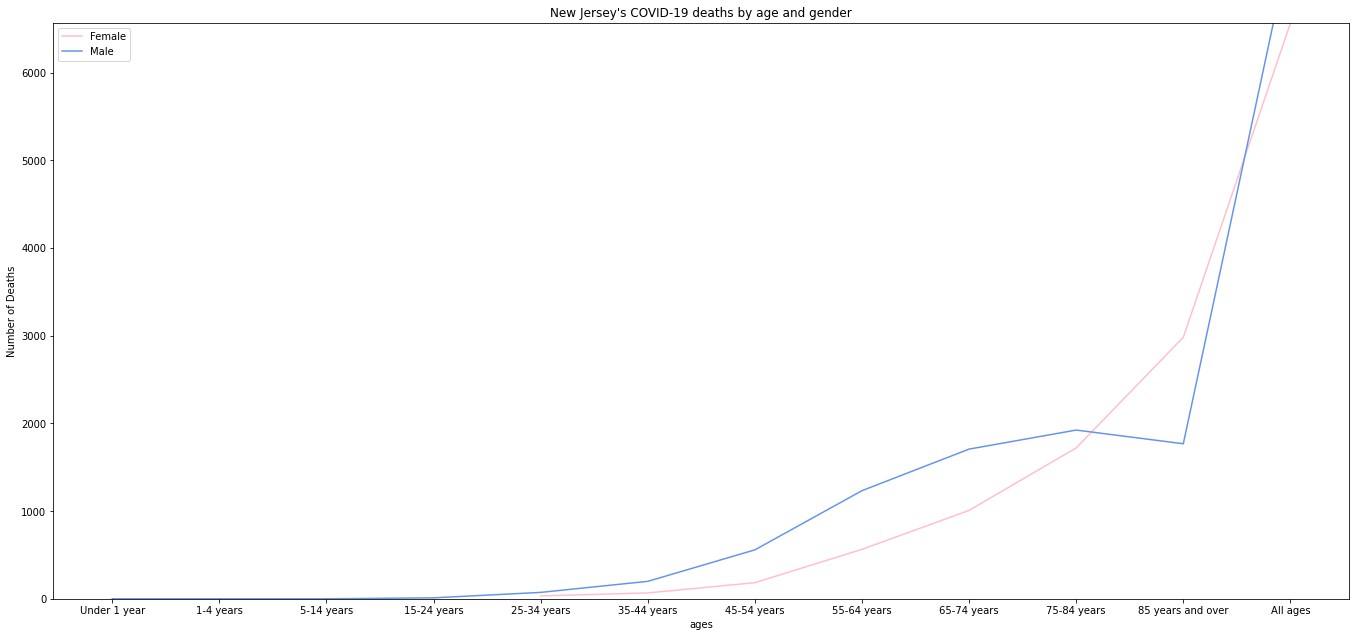

In [21]:
demo_of_deathsPlot("New Jersey")

In [22]:
def demos_of_deathsBar(state):
  user_state = cdc_df.loc[cdc_df["State"]== state] # Seperates rows based on the state the user enters
  female_rows = user_state.loc[user_state["Sex"] == "Female"] # Seperates all female rows
  male_rows = user_state.loc[user_state["Sex"] == "Male"] # # Seperates all male rows

  female_ages = female_rows["Age group"] # stores age groups of females in a variable
  male_ages = male_rows["Age group"] # stores age groups of females in a variable

  female_deaths = female_rows["COVID-19 Deaths"] # stores covid-19 deaths of females in a variable
  male_deaths = male_rows["COVID-19 Deaths"] # stores covid-19 deaths of males in a variable

  data = [female_deaths, male_deaths] # data variable stores bar data
  X = np.arange(len(female_ages)) # X constant return evenly spaced values within a given interval
  bar_width = 0.35 # variable holds the value of the bar widths

  fig = plt.figure() # sets the figure
  ax = fig.add_axes([0, 0, 2.5, 2])  #resizes figure: [starting point x, startng point y, length, width]
  plt.ylabel("Number of Deaths") # displays the y-axis label
  plt.title(state + "'s COVID-19 deaths by age and gender") # displays the title
  
  ax.bar(X + 0.00, data[0], width = 0.25, color = "pink", label = "Female") # plots female bars
  ax.bar(X + 0.25, data[1], width = 0.25, color = "cornflowerblue", label = "Male") # plots male bars
  plt.xticks(X + bar_width, female_ages)

  plt.legend(loc = "upper center") # displays legend at the top of the figure
  plt.show() # displays figure

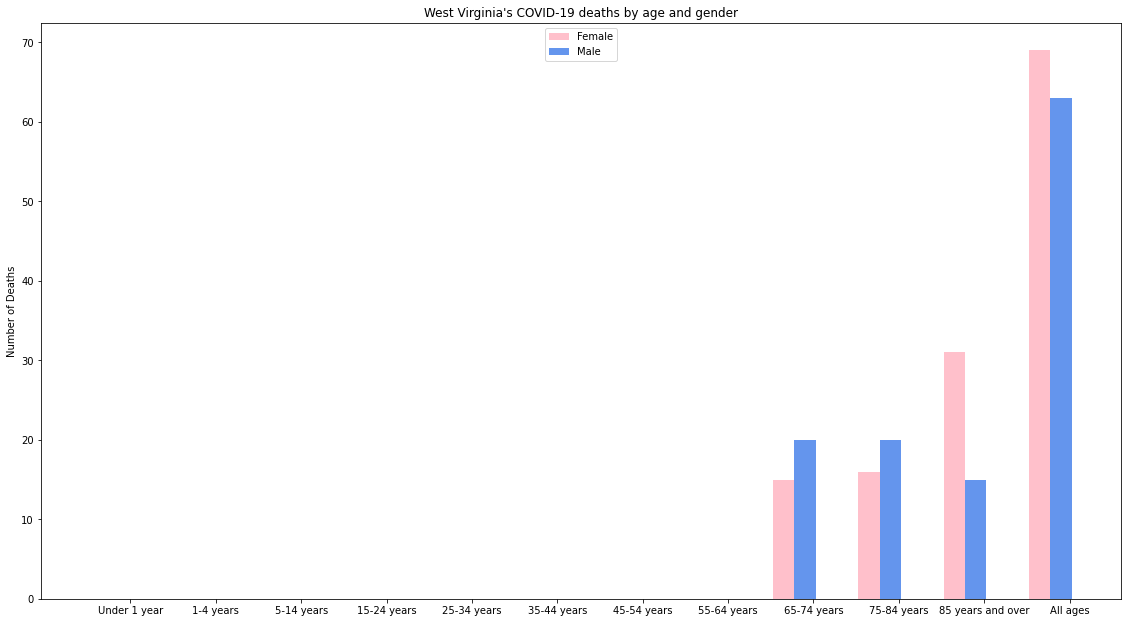

In [23]:
demos_of_deathsBar("West Virginia")

## 3 - Challenge (optional): Find a dataset online that explores other ways that COVID-19 has impacted the United States and use pandas and Plotly to create a visualization based on it.

Some ideas:
* number of business closures in each state over time
* number of people telecommuting in the US
* number of hospitalizations in each state

etc..

In [ ]:
cases = dfFormatter(nyt_df, "cases")
deaths = dfFormatter(nyt_df, "deaths")
deaths["State abbreviations"] = stateAbbreviationList

def caseFatalityrate_map(date):
  colors = ['#f7fcf5','#e5f5e0','#c7e9c0','#a1d99b','#74c476','#41ab5d','#238b45','#006d2c','#00441b']
  case_fatalityRate = deaths[date]/cases[date]
  fat_fig = go.Figure(data = go.Choropleth(
                  locationmode= "USA-states",
                  locations = deaths["State abbreviations"],
                  z = (case_fatalityRate * 100),
                  colorscale = colors,
                  reversescale = False,
                  autocolorscale = False, #reads our color scale
                  colorbar_title = "COVID-19 Case Fatality rates (percent)"
  ))
  
  fat_fig.update_layout(
      title_text = "COVID-19 Case Fatality rates (US)",
      geo = dict(
          showcoastlines = True,
          scope = "usa"
      )
  )
  fat_fig.show()

caseFatalityrate_map('2020-08-19')